## IntervalView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@465e45d7

This `Op` wraps the `Views.interval()` method of ImgLib2, creating an [`Interval`](http://javadoc.scijava.org/ImgLib2/net/imglib2/Interval.html) over any [`RandomAccessible`](http://javadoc.scijava.org/ImgLib2/net/imglib2/RandomAccessible.html). Often times `intervalView` is needed before calling an `Op` that requires a `RandomAccessibleInterval`, but the input that we want to pass through does not have the required `Interval`. Let's see how it is called:

In [2]:
ij.op().help('intervalView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.intervalView.DefaultIntervalView(
		RandomAccessible in,
		Interval interval)
	(IntervalView out) =
	net.imagej.ops.transform.intervalView.IntervalViewMinMax(
		RandomAccessible in,
		long[] min,
		long[] max)

As you can see we can either create our `Interval` beforehand, or we can just pass through a minimum and maximum and let the `Op` do the `Interval` creation for us. We will use the latter option in our example. Let's get an input image:

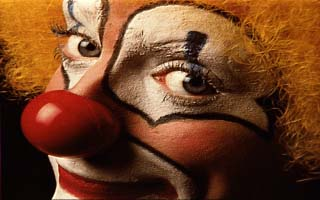

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

Let's find a more interesting section instead of running the `Op` on the whole image:

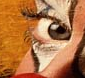

In [4]:
import net.imglib2.FinalInterval
region = FinalInterval.createMinSize(30, 17, 0, 85, 78, 3)

eye = ij.op().run("crop", input, region)

ij.notebook().display(eye)

One of the easiest ways of getting a `RandomAccessible` is through using [`extendView`](extendView.ipynb) or any similar `Op`s.

In [5]:
extended = ij.op().run("extendZeroView", eye)

ij.notebook().display(extended)

groovy.lang.MissingMethodException:  No signature of method

Note that the above `display()` call errors, since `display` cannot display a `RandomAccessible` (i.e. an infinite image). This is one example where `intervalView` (on line 9) comes in handy (and this is why you see `intervalView` so many times in the notebooks):

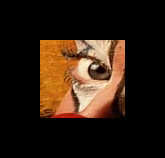

In [6]:
//this function adds t pixels to the top of the given image interval, 
// r pixels to the right, b pixels to the bottom, and l pixels to the left:
def pad(image, extended, t, r, b, l) {
  min = new long[image.numDimensions()]
  max = new long[image.numDimensions()]
  image.min(min)
  image.max(max)
  min[0] -= l; min[1] -= t; max[0] += r; max[1] += b
  return ij.op().run("intervalView", extended, min, max)
}

//let's extend our image out 20 pixels on each side
padLength = 40
padded = pad(eye, extended, padLength, padLength, padLength, padLength)

ij.notebook().display(padded)

And now that can be passed to `display`.